# Linear Regression, not just about lines and planes

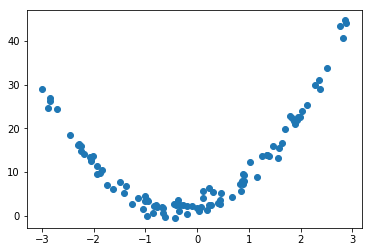

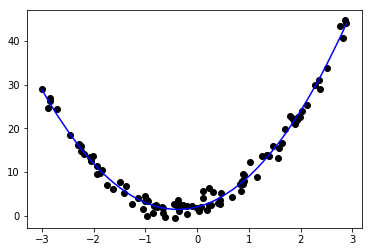

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# this line should be commented out for regular python run 
%matplotlib inline  
# this line should be commented out for regular python run 


""" Hyperparameter """
data_size = 100
batch_size = 10
lr = 1e-2
epoch = 1000


""" Data Generation """
np.random.seed(337)

x_data = np.random.uniform(-3., 3., (data_size,1)).astype(np.float32)
y_data = (4 * x_data**2 + 3 * x_data + 2 + \
          1.5 * np.random.normal(0, 1, (data_size,1))).astype(np.float32) 

plt.plot(x_data, y_data, 'o')
plt.show()


""" Graph Construction """
tf.random.set_random_seed(337)

# placeholders
# x = tf.placeholder(tf.float32, shape=(None, 1), name='x')
# y = tf.placeholder(tf.float32, shape=(None, 1), name='y')
x = tf.placeholder(tf.float32, shape=(batch_size, 1), name='x')
y = tf.placeholder(tf.float32, shape=(batch_size, 1), name='y')

# weights
W1 = tf.get_variable("W1", shape=(1, 1), \
        initializer=tf.contrib.layers.variance_scaling_initializer(mode="FAN_AVG"))
W2 = tf.get_variable("W2", shape=(1, 1), \
        initializer=tf.contrib.layers.variance_scaling_initializer(mode="FAN_AVG"))
b = tf.get_variable("b", shape=(), \
        initializer=tf.constant_initializer(0.0))

# prediction
y_pred = (tf.square(x) @ W2) + (x @ W1) + b

# cost
cost = tf.nn.l2_loss(y - y_pred)

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)


""" Train """
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    # run gradient descent
    for i in range(epoch):
        idx = np.random.permutation(np.arange(data_size)) 
        x_batch = x_data[idx]
        y_batch = y_data[idx]
        for batch_number in range(int(data_size/batch_size)): 
            x_b = x_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            y_b = y_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            feed_dict = {x: x_b, y: y_b}
            _, cost_now = sess.run([train_op, cost], feed_dict=feed_dict)
            #print(cost_now)

    # compute outputs of linear regression given x_data
    # y_now = sess.run(y_pred, feed_dict={x: x_data})
    y_now = np.empty_like(y_data)
    for batch_number in range(int(data_size/batch_size)):
        x_b = x_data[batch_number*batch_size:(batch_number+1)*batch_size]
        feed_dict = {x: x_b}
        y_temp = sess.run(y_pred, feed_dict=feed_dict)
        y_now[batch_number*batch_size:(batch_number+1)*batch_size] = y_temp
        
    fig, ax = plt.subplots()
    ax.plot(x_data, y_data, 'ok')
    
    x_data = x_data.reshape((-1,))
    idx = np.argsort(x_data)
    ax.plot(x_data[idx], y_now[idx], 'b')
     
    plt.show()